In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Graphing and Visualizations

In [3]:
data = pd.read_csv("../Data/Intermediate/CDCSTDoverall2000_2020_processed.csv")

In [4]:
data.head()
data.drop(columns=["Unnamed: 0"])

,year,fips,cases_chlamydia,cases_early_non-primary_non-secondary_syphilis,cases_gonorrhea,cases_primary_and_secondary_syphilis,rate_per_100000_chlamydia,rate_per_100000_early_non-primary_non-secondary_syphilis,rate_per_100000_gonorrhea,rate_per_100000_primary_and_secondary_syphilis,...,rate_per_100000_male_gonorrhea_multiracial,rate_per_100000_male_gonorrhea_native_hawaiian_other_pacific_islander,rate_per_100000_male_gonorrhea_white,rate_per_100000_male_primary_and_secondary_syphilis_american_indian_alaska_native,rate_per_100000_male_primary_and_secondary_syphilis_asian,rate_per_100000_male_primary_and_secondary_syphilis_black_african_american,rate_per_100000_male_primary_and_secondary_syphilis_hispanic_latino,rate_per_100000_male_primary_and_secondary_syphilis_multiracial,rate_per_100000_male_primary_and_secondary_syphilis_native_hawaiian_other_pacific_islander,rate_per_100000_male_primary_and_secondary_syphilis_white
0,2000,45001,61.0,1.0,57.0,2.0,232.6,3.8,217.4,7.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,22001,0.0,8.0,0.0,11.0,0.0,13.6,0.0,18.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,51001,153.0,2.0,88.0,0.0,398.7,5.2,229.3,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,16001,644.0,0.0,33.0,1.0,212.3,0.0,10.9,0.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,19001,8.0,0.0,0.0,0.0,97.6,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67581,2020,4027,982.0,19.0,192.0,4.0,459.3,8.9,89.8,1.9,...,79.9,NaN,38.4,0.0,0.0,0.0,2.9,0.0,0.0,3.0
67582,2020,8125,14.0,0.0,1.0,0.0,139.7,0.0,10.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67583,2020,48505,46.0,0.0,4.0,0.0,324.4,0.0,28.2,0.0,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
67584,2020,48507,42.0,0.0,11.0,0.0,354.7,0.0,92.9,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df_sum = data.groupby(['year'])['cases_gonorrhea','cases_chlamydia','cases_early_non-primary_non-secondary_syphilis','cases_primary_and_secondary_syphilis'].sum().reset_index()

/var/folders/jb/2grr3hjx7fng_kz01_rqpskm0000gn/T/ipykernel_11325/3700150800.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_sum = data.groupby(['year'])['cases_gonorrhea','cases_chlamydia','cases_early_non-primary_non-secondary_syphilis','cases_primary_and_secondary_syphilis'].sum().reset_index()


In [6]:
df_sum.head()
df_sum = df_sum[df_sum.year >= 2002]

/var/folders/jb/2grr3hjx7fng_kz01_rqpskm0000gn/T/ipykernel_11325/2600653027.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


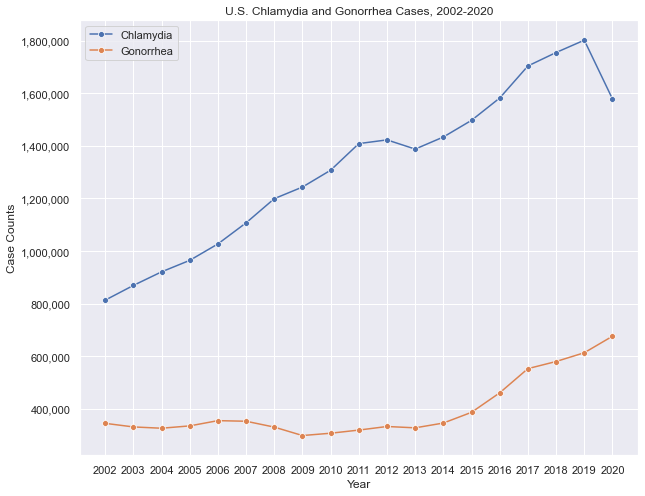

In [7]:
sns.set_theme()
plt.figure(figsize = (10,8))
g = sns.lineplot(data = df_sum, x = 'year', y = 'cases_chlamydia',marker = "o")
sns.lineplot(data = df_sum, x = 'year', y = 'cases_gonorrhea',marker = "o")
g.set_ylabel('Case Counts')
g.set_xlabel('Year')
g.set_xticks(df_sum['year'])
g.set_title("U.S. Chlamydia and Gonorrhea Cases, 2002-2020")
plt.legend(labels=["Chlamydia","Gonorrhea"])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.savefig('../Output/PosterPresentation/cases_chlamydia_gonorrhea.png',dpi=300)
plt.show()

/var/folders/jb/2grr3hjx7fng_kz01_rqpskm0000gn/T/ipykernel_11325/996096626.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


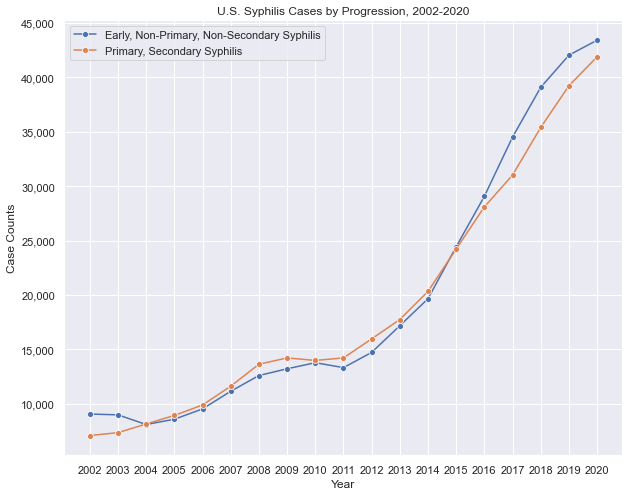

In [8]:
plt.figure(figsize = (10,8))
g = sns.lineplot(data = df_sum, x = 'year', y = 'cases_early_non-primary_non-secondary_syphilis', marker = "o")
sns.lineplot(data = df_sum, x = 'year', y = 'cases_primary_and_secondary_syphilis', marker = "o")
g.set_ylabel('Case Counts')
g.set_xlabel('Year')
g.set_xticks(df_sum['year'])
g.set_title("U.S. Syphilis Cases by Progression, 2002-2020")
plt.legend(labels=["Early, Non-Primary, Non-Secondary Syphilis","Primary, Secondary Syphilis"])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.savefig('../Output/PosterPresentation/cases_syphilis.png',dpi=300)
plt.show()

/var/folders/jb/2grr3hjx7fng_kz01_rqpskm0000gn/T/ipykernel_11325/4050417969.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
/var/folders/jb/2grr3hjx7fng_kz01_rqpskm0000gn/T/ipykernel_11325/4050417969.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


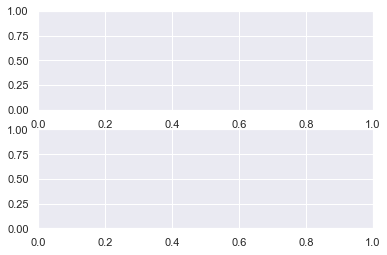

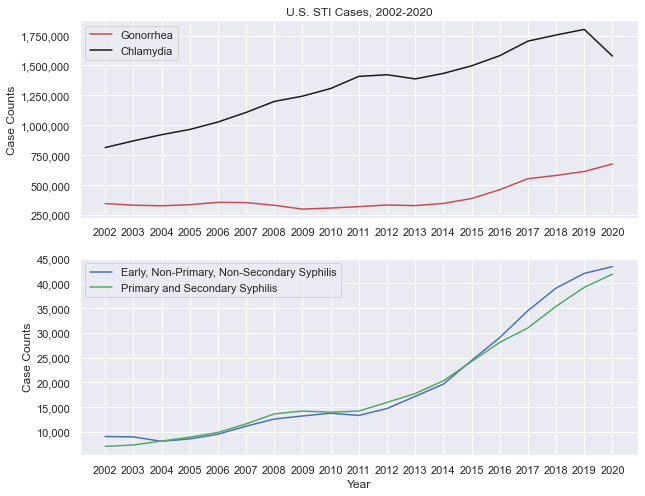

In [9]:
fig, ax = plt.subplots(nrows=2,ncols=1)
plt.figure(figsize = (10,8))
plt.subplot(2,1,1)
plt.plot(df_sum['cases_gonorrhea'], 'r', label='Gonorrhea')
plt.plot(df_sum['cases_chlamydia'], 'k', label='Chlamydia')
plt.legend()
plt.ylabel('Case Counts')
# plt.xticks(df_sum['year'])
plt.title("U.S. STI Cases, 2002-2020")
plt.xticks(ticks=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], labels=[2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.subplot(2,1,2)
plt.plot(df_sum['cases_early_non-primary_non-secondary_syphilis'], 'b', label='Early, Non-Primary, Non-Secondary Syphilis')
plt.plot(df_sum['cases_primary_and_secondary_syphilis'], 'g', label='Primary and Secondary Syphilis')
plt.legend()
plt.ylabel('Case Counts')
# plt.xticks(df_sum['year'])
plt.xlabel('Year')
plt.xticks(ticks=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], labels=[2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.savefig('../Output/PosterPresentation/cases_gonorrhea_chlamydia_syphilis',dpi=300)
plt.show()

# Predictions

## National-Level Chlamydia Prediction

In [10]:
data = pd.read_csv("../Data/Final/STI0220_cov20_pop0220.csv")
data.drop(columns=["Unnamed: 0"])
data.head()

,Unnamed: 0,year,fips,cases_chlamydia,cases_early_non-primary_non-secondary_syphilis,cases_gonorrhea,cases_primary_and_secondary_syphilis,rate_per_100000_chlamydia,rate_per_100000_early_non-primary_non-secondary_syphilis,rate_per_100000_gonorrhea,...,pct_ind_transportation_and_warehousing_and_utilities,pct_ind_information,pct_ind_finance_and_insurance_and_real_estate_and_rental_and_leasing,pct_ind_professional_scientific_and_management_and_administrative_and_waste_management_services,pct_ind_educational_services_and_health_care_and_social_assistance,pct_ind_arts_entertainment_and_recreation_and_accommodation_and_food_services,pct_ind_other_services_except_public_administration,pct_ind_public_administration,health_insurance_rate,poverty_rate
0,0,2000,45001,61.0,1.0,57.0,2.0,232.6,3.8,217.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2000,22001,0.0,8.0,0.0,11.0,0.0,13.6,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2000,51001,153.0,2.0,88.0,0.0,398.7,5.2,229.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2000,16001,644.0,0.0,33.0,1.0,212.3,0.0,10.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2000,19001,8.0,0.0,0.0,0.0,97.6,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df_sum = data.groupby(['year'])['cases_gonorrhea','cases_chlamydia','cases_early_non-primary_non-secondary_syphilis','cases_primary_and_secondary_syphilis', "total_pop"].sum().reset_index()
df_sum.head()

/var/folders/jb/2grr3hjx7fng_kz01_rqpskm0000gn/T/ipykernel_11325/1022705614.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_sum = data.groupby(['year'])['cases_gonorrhea','cases_chlamydia','cases_early_non-primary_non-secondary_syphilis','cases_primary_and_secondary_syphilis', "total_pop"].sum().reset_index()


,year,cases_gonorrhea,cases_chlamydia,cases_early_non-primary_non-secondary_syphilis,cases_primary_and_secondary_syphilis,total_pop
0,2000,211107.0,382743.0,9442.0,5967.0,281962503
1,2001,245354.0,487479.0,8705.0,6099.0,284766832
2,2002,345739.0,813390.0,8427.0,6863.0,287419892
3,2003,332124.0,869331.0,8357.0,7175.0,289899614
4,2004,327136.0,920962.0,7766.0,7977.0,292594125


In [20]:
df_model = df_sum[["year", "cases_chlamydia"]]
df_model["year"] = df_model["year"].astype(int)
actual_value = df_model.at[20, "cases_chlamydia"]
df_plot = df_model
print(df_model.head(21))
df_model = df_model[df_model["year"] <= 2019]


    year  cases_chlamydia
0   2000         382743.0
1   2001         487479.0
2   2002         813390.0
3   2003         869331.0
4   2004         920962.0
5   2005         964523.0
6   2006        1021988.0
7   2007        1099171.0
8   2008        1191991.0
9   2009        1235784.0
10  2010        1306840.0
11  2011        1407929.0
12  2012        1421949.0
13  2013        1387063.0
14  2014        1432900.0
15  2015        1496908.0
16  2016        1581694.0
17  2017        1703380.0
18  2018        1754475.0
19  2019        1801295.0
20  2020        1578111.0


/var/folders/jb/2grr3hjx7fng_kz01_rqpskm0000gn/T/ipykernel_11325/1069527853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model["year"] = df_model["year"].astype(int)


In [13]:
print(actual_value)

1578111.0


In [14]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_model["cases_chlamydia"], order=(2,2,0))
model_fit = model.fit()

In [15]:
 # summary of fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:        cases_chlamydia   No. Observations:                   20
Model:                 ARIMA(2, 2, 0)   Log Likelihood                -231.431
Date:                Mon, 25 Jul 2022   AIC                            468.861
Time:                        17:33:36   BIC                            471.532
Sample:                             0   HQIC                           469.230
                                 - 20                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3638      0.086     -4.214      0.000      -0.533      -0.195
ar.L2          0.1745      0.081      2.145      0.032       0.015       0.334
sigma2      1.689e+09   2.67e-11   6.33e+19      0.0

In [16]:
pred = model_fit.predict(20).to_frame()
fitted_value = pred.iloc[0][0]

In [17]:
print("Predicted: " + str(fitted_value) + " Actual: " + str(actual_value))

Predicted: 1837355.0071587928 Actual: 1578111.0


/var/folders/jb/2grr3hjx7fng_kz01_rqpskm0000gn/T/ipykernel_11325/898943873.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


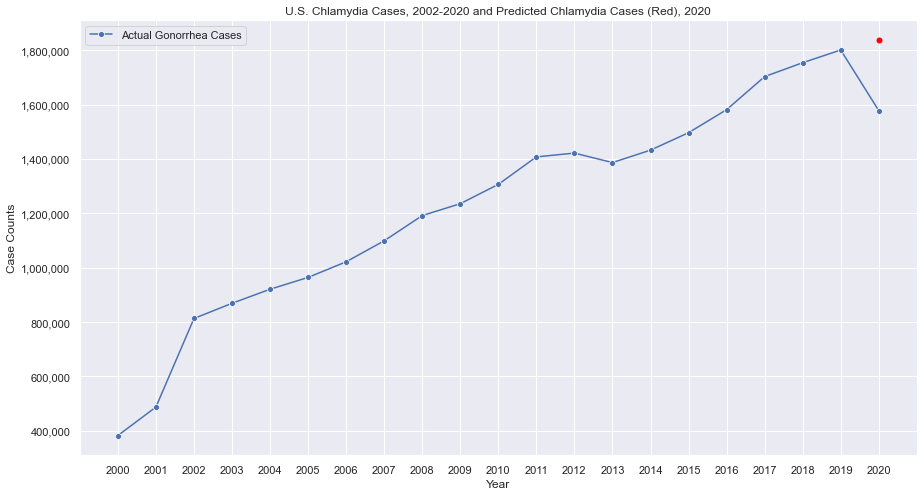

In [18]:
sns.set_theme()
plt.figure(figsize = (15,8))
g = sns.lineplot(data = df_plot, x = 'year', y = 'cases_chlamydia', marker = "o")
g.set_ylabel('Case Counts')
g.set_xlabel('Year')
g.set_xticks(df_sum['year'])
g.set_title("U.S. Chlamydia Cases, 2002-2020 and Predicted Chlamydia Cases (Red), 2020")
plt.legend(labels=["Actual Gonorrhea Cases"])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.scatter(2020, fitted_value, marker='o', s=25, c="red")
plt.savefig('../Output/PosterPresentation/ModelOutputs/arima_chlamydia.png',dpi=300)
plt.show()